In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv("human_face_dataset.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
df.shape

(35887, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [5]:
df.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [7]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

#### Training and Testing data:

df_train,df_test = train_test_split(df,train_size=0.7,random_state=50)

y_train = df_train.pop('emotion')
X_train = df_train

y_test = df_test.pop('emotion')
X_test = df_test

print(X_train)
print(y_train)

                                                  pixels        Usage
27683  61 70 83 93 81 84 107 95 108 111 110 120 110 1...     Training
6731   87 85 95 107 97 106 86 90 111 102 61 44 39 42 ...     Training
24202  251 253 255 255 255 255 254 255 254 208 158 14...     Training
35482  221 218 217 215 212 206 188 195 197 173 161 16...  PrivateTest
25696  208 209 209 212 215 218 215 210 206 201 203 13...     Training
...                                                  ...          ...
8559   54 153 246 226 238 228 232 234 222 219 233 234...     Training
34887  180 190 189 196 197 197 197 196 196 194 174 15...  PrivateTest
32022  120 121 119 117 119 119 119 121 120 131 184 21...   PublicTest
22637  216 224 134 82 100 197 175 81 70 78 74 76 82 8...     Training
14000  254 254 253 253 250 255 222 102 77 69 61 64 61...     Training

[25120 rows x 2 columns]
27683    6.0
6731     0.0
24202    2.0
35482    2.0
25696    2.0
        ... 
8559     3.0
34887    0.0
32022    3.0
22637    2.0
1400

<AxesSubplot:>

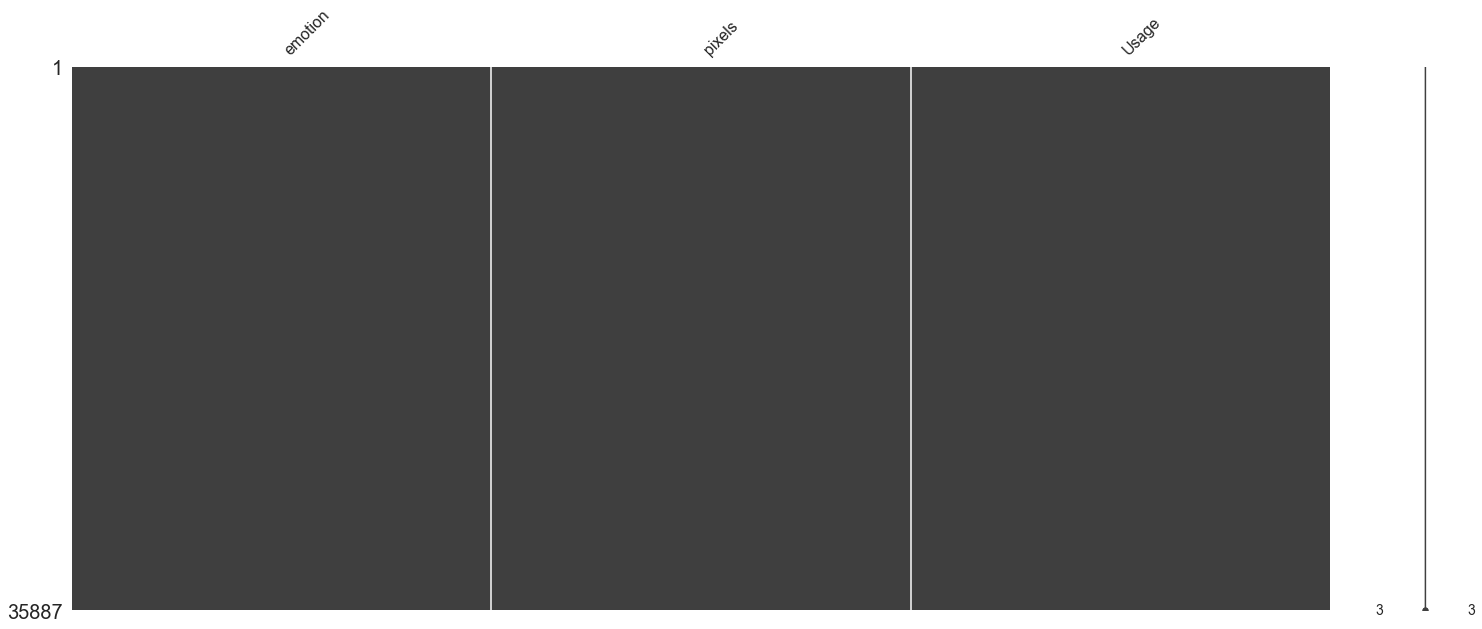

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
duplicated = df.duplicated().sum()
if duplicated:
    print("Duplicate rows in Dataset are {}".format(duplicated))
else:
    print("Dataset contains no duplicate values")
duplicated = df[df.duplicated(keep=False)]
duplicated.head()

Duplicate rows in Dataset are 1234


,emotion,pixels,Usage
30,3,234 233 228 231 234 233 236 230 236 196 112 85...,Training
38,0,255 82 0 3 0 0 0 0 0 0 3 0 16 17 3 60 29 0 1 2...,Training
50,2,99 95 101 114 124 129 128 127 128 124 123 125 ...,Training
62,3,210 161 140 166 159 98 96 141 157 137 110 107 ...,Training
69,5,43 43 43 40 45 63 93 140 144 153 159 167 168 1...,Training


In [11]:
df['emotion'].unique()
df.emotion.value_counts()
df[df['emotion'] == 4]

df.loc[df['emotion'] == 4, 'emotion'] = np.NaN
df['emotion'].unique()

df.pixels.value_counts()
df[df['pixels'] == 0]

df.loc[df['pixels'] == 0, 'pixels'] = np.NaN
df['pixels'].unique()

df = df.fillna(df.median()) # Replacing with Mean


<AxesSubplot:>

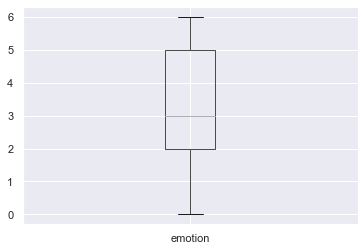

In [12]:
df.boxplot()

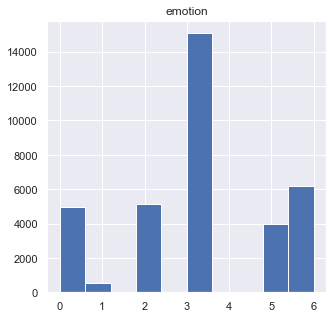

In [18]:
#bargrapgh_eda_dist
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
df.hist(ax=ax)
plt.show()

<AxesSubplot:>

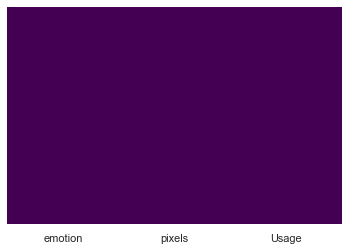

In [14]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

<AxesSubplot:>

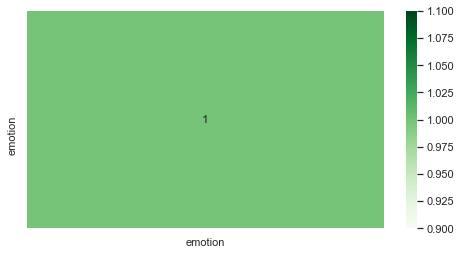

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [16]:
df["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64